In [ ]:
from google.colab import drive

In [ ]:
drive.mount('\content\drive')

TIMEOUT: <pexpect.popen_spawn.PopenSpawn object at 0x7c5425a93a60>
searcher: searcher_re:
    0: re.compile('google.colab.drive MOUNTED')
    1: re.compile('root@316d6af3255c-69f87ce3c6a143db9d4249e170c46491: ')
    2: re.compile('Drive File Stream encountered a problem and has stopped')
    3: re.compile('drive EXITED')
    4: re.compile('The domain policy has disabled Drive File Stream')
<pexpect.popen_spawn.PopenSpawn object at 0x7c5425a93a60>
searcher: searcher_re:
    0: re.compile('google.colab.drive MOUNTED')
    1: re.compile('root@316d6af3255c-69f87ce3c6a143db9d4249e170c46491: ')
    2: re.compile('Drive File Stream encountered a problem and has stopped')
    3: re.compile('drive EXITED')
    4: re.compile('The domain policy has disabled Drive File Stream')

In [ ]:
import os

# Specify the folder path
folder_path = '/content/drive/MyDrive/Stable_Diffusion_files'

# List the files in the folder
files = os.listdir(folder_path)

# Print the list of files
print("Files in the folder:")
for file in files:
    print(file)


Files in the folder:
encoder.py
decoder.py
attention.py
clip.py
diffusion.py
pipeline.py
ddpm.py
model_loader.py
model_converter.py
demo.ipynb
data
images


In [ ]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.9/800.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 57.0 MB/s eta 0:00:00


<ipython-input-1-795274a403ab>:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


100%|██████████| 50/50 [36:33<00:00, 43.86s/it]


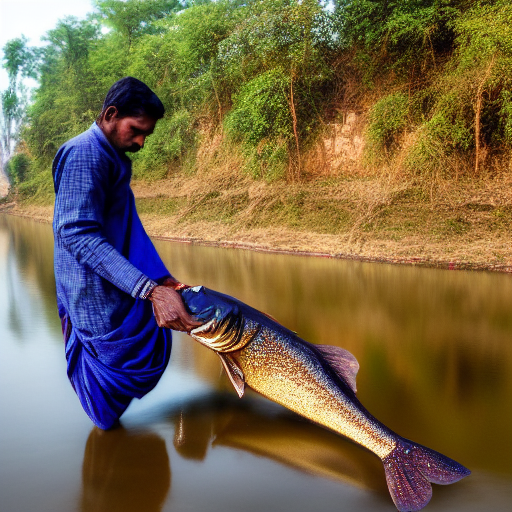

In [ ]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

vocab_file = "/content/drive/MyDrive/Stable_Diffusion_files/data/vocab.json"
merges_file = "/content/drive/MyDrive/Stable_Diffusion_files/data/merges.txt"
tokenizer = CLIPTokenizer(vocab_file, merges_file=merges_file)
model_file = "/content/drive/MyDrive/Stable_Diffusion_files/data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A person from Maharastra in Fisherman Clothes near a river catching a big catfish, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "./content/drive/MyDrive/Stable_Diffusion_files/images/horse.jpeg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

<ipython-input-1-80e534cb1311>:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


100%|██████████| 50/50 [37:02<00:00, 44.45s/it]


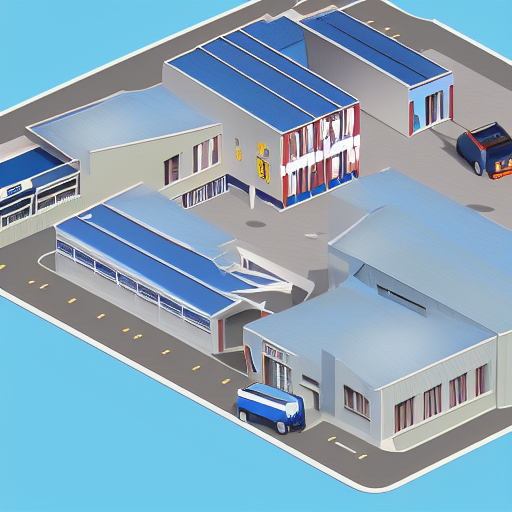

In [ ]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

vocab_file = "/content/drive/MyDrive/Stable_Diffusion_files/data/vocab.json"
merges_file = "/content/drive/MyDrive/Stable_Diffusion_files/data/merges.txt"
tokenizer = CLIPTokenizer(vocab_file, merges_file=merges_file)
model_file = "/content/drive/MyDrive/Stable_Diffusion_files/data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A school with 4 wings and 3 grounds,teachers are entering through main gate and school bus is arriving on the first wing,buildings are sky blue and white in color, highly detailed, ultra sharp, animated, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "./content/drive/MyDrive/Stable_Diffusion_files/images/horse.jpeg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)